In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, \
precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [58]:
data = pd.read_csv('social.csv')

In [59]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [60]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [61]:
data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [62]:
data.shape

(400, 5)

# Dropping Unnecessary Column

In [63]:
data.drop(columns=['User ID'], inplace=True)

In [64]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


# Preprocessing

In [65]:
inputs = data.drop(columns=['Purchased'])
target = data['Purchased']

In [84]:
target.value_counts().values[0] / 400 * 100

np.float64(64.25)

In [66]:
Gender = inputs.iloc[:,0:1]

encoder = OrdinalEncoder()
Gender = pd.DataFrame(encoder.fit_transform(Gender))

In [67]:
inputs['Gender'] = Gender

In [68]:
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=365,
                                                    stratify = target
                                                    )

In [69]:
y_train.value_counts()

,count
Purchased,
0,180
1,100


In [70]:
y_test.value_counts()

,count
Purchased,
0,77
1,43


In [71]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification

In [72]:
C = 1.0

In [73]:
svc = svm.SVC(kernel='linear', C=C)

In [75]:
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [78]:
y_pred_test = svc.predict(X_test_scaled)

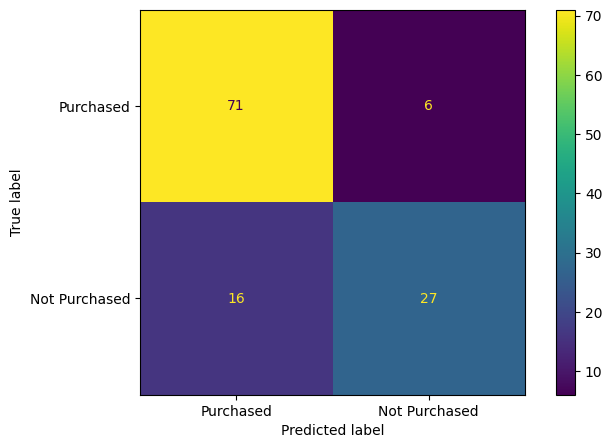

In [89]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels = ['Purchased', 'Not Purchased'],
)

cmp.plot(ax=ax)

In [90]:
print(classification_report(y_test, y_pred_test, target_names = ['Purchased', 'Not Purchased']))

               precision    recall  f1-score   support

    Purchased       0.82      0.92      0.87        77
Not Purchased       0.82      0.63      0.71        43

     accuracy                           0.82       120
    macro avg       0.82      0.77      0.79       120
 weighted avg       0.82      0.82      0.81       120

